In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


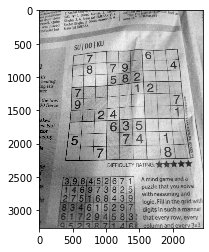

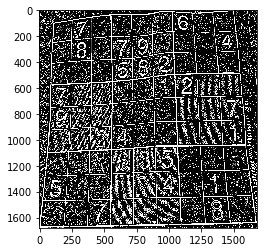

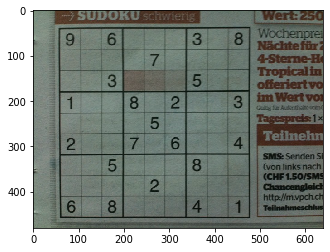

In [102]:
import queue
import cv2



def make_it_square(image, side_length=306):
    return cv2.resize(image, (side_length, side_length))


def cut_out_sudoku_puzzle( image, contour):
    x, y, w, h = cv2.boundingRect(contour)
    image = image[y:y + h, x:x + w]
    return make_it_square(image, min(image.shape))


def largestContour(image):
    if cv2.__version__.startswith('2.'):
        contours, h = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    else:
        contours, h = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return max(contours, key=cv2.contourArea)


img = cv2.imread('grid.jpg',0)

#img = cv2.convertScaleAbs(img)

jmp = cv2.imread('sdk3.jpg',1)
plt.imshow(img,cmap='gray')
plt.show()
img = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 15, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
contour = largestContour(img)

jmp = cv2.drawContours(jmp,contour,-1,(0,255,0),3)
img = cut_out_sudoku_puzzle(img.copy(), contour)
w,h = img.shape
plt.imshow(img,cmap='gray')
plt.show()
#jmp = img[0:0+w//9,8*h//9:]
plt.imshow(jmp)
plt.show()




In [103]:
def approx(cnt):
    peri = cv2.arcLength(cnt, True)
    app = cv2.approxPolyDP(cnt, 0.01 * peri, True)
    return app
def larfourside(imag):
    contours,h = cv2.findContours(imag, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for cnt in contours[:min(5,len(contours))]:
        #im = image.copy()
        #cv2.drawContours(im, cnt, -1, (255,255,255), 5)
        #self.show(im,'contour')
        if len(approx(cnt)) == 4:
            return cnt
    return None
contour = larfourside(img)
a = approx(contour)
pts = a.reshape(4, 2)
rect = np.zeros((4, 2), dtype="float32")
s = pts.sum(axis=1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]
diff = np.diff(pts, axis=1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]

(tl, tr, br, bl) = rect
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

# ...and now for the height of our new image
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

# take the maximum of the width and height values to reach
# our final dimensions
maxWidth = max(int(widthA), int(widthB))
maxHeight = max(int(heightA), int(heightB))

# construct our destination points which will be used to
# map the screen to a top-down, "birds eye" view
dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]], dtype="float32")

# calculate the perspective transform matrix and warp
# the perspective to grab the screen
print(rect)
print(dst)
M = cv2.getPerspectiveTransform(rect, dst)
warp = cv2.warpPerspective(img, M, (maxWidth, maxHeight))
img =make_it_square(warp)

[[ 111.   99.]
 [1505.    0.]
 [1679. 1639.]
 [   0. 1676.]]
[[   0.    0.]
 [1678.    0.]
 [1678. 1647.]
 [   0. 1647.]]


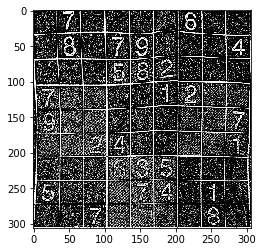

In [104]:
plt.imshow(img,cmap='gray')
plt.show()

[[253 255 231 ...   0   0 255]
 [ 93 201  94 ...   0   0 255]
 [250 255   0 ...   0   0 255]
 ...
 [  2 255   6 ...   0   0   0]
 [  1 255  34 ...   0 225   0]
 [  2 255  92 ...   0   0   0]]
0 0


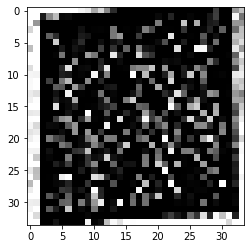

0 1


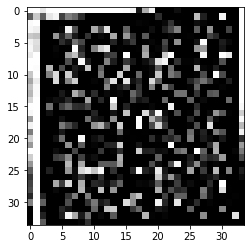

0 2


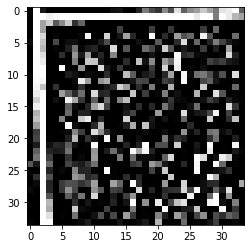

0 3


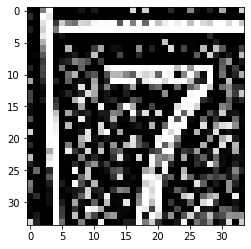

0 4


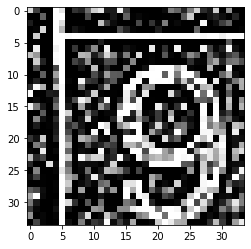

0 5


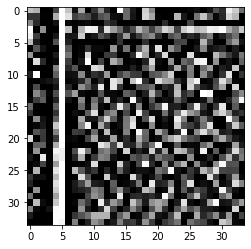

0 6


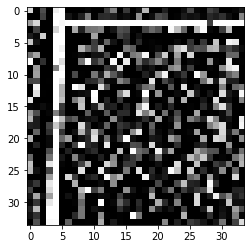

0 7


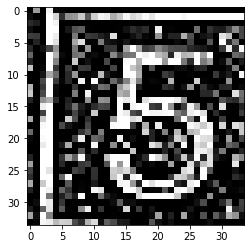

1 0


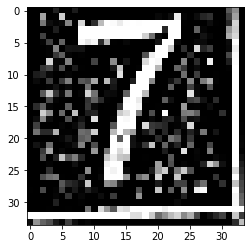

1 1


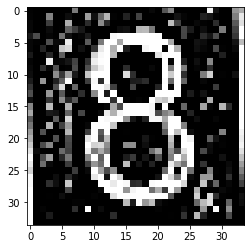

1 2


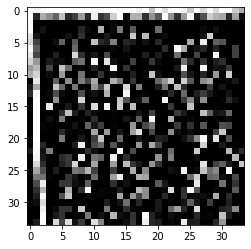

1 3


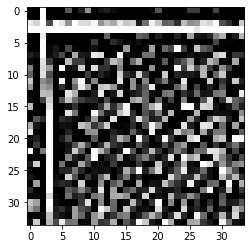

1 4


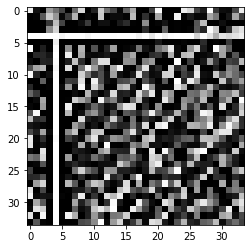

1 5


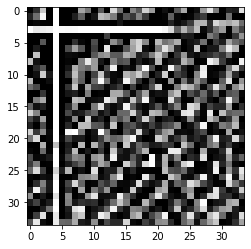

1 6


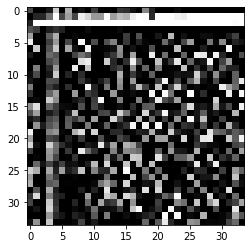

1 7


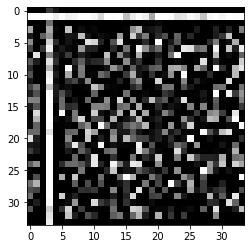

2 0


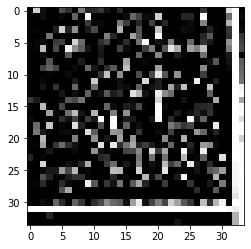

2 1


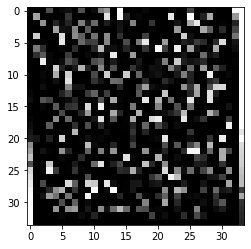

2 2


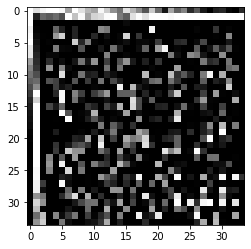

2 3


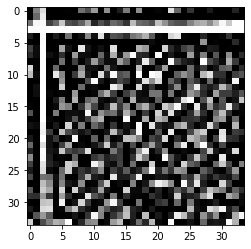

2 4


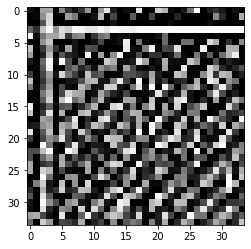

2 5


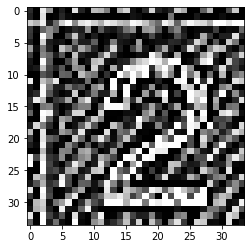

2 6


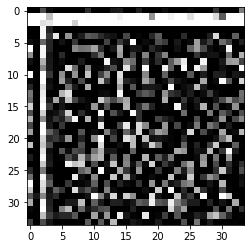

2 7


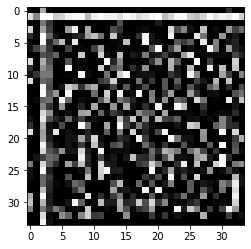

3 0


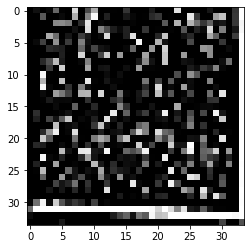

3 1


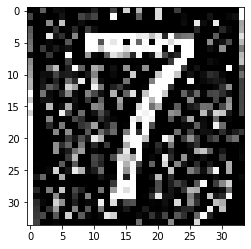

3 2


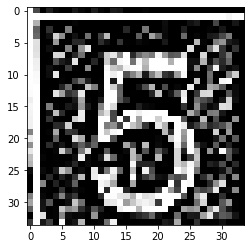

3 3


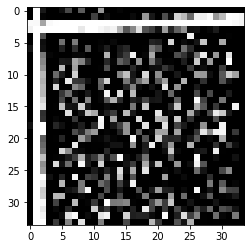

3 4


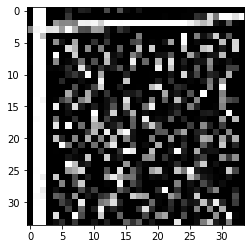

3 5


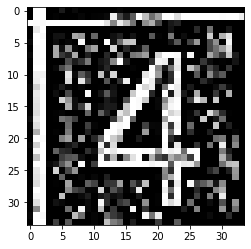

3 6


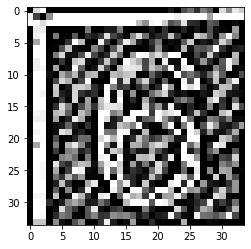

3 7


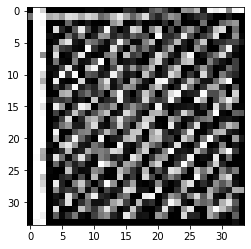

4 0


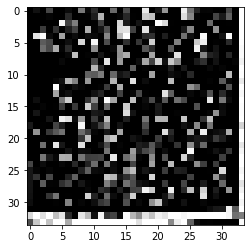

4 1


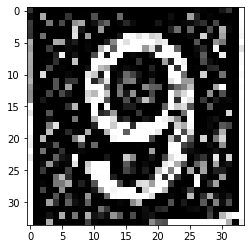

4 2


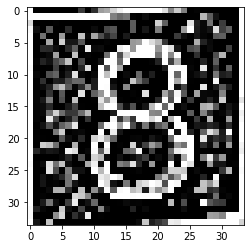

4 3


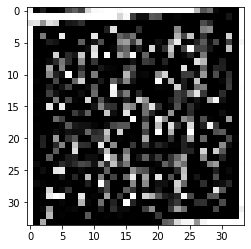

4 4


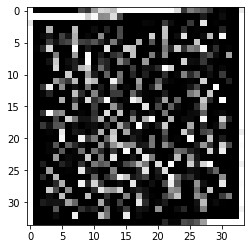

4 5


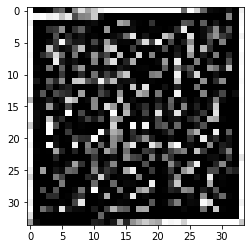

4 6


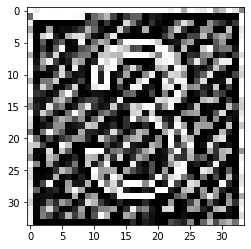

4 7


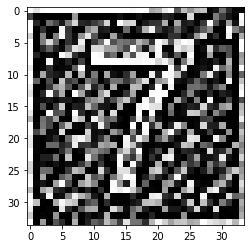

5 0


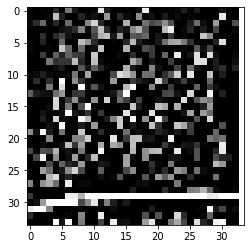

5 1


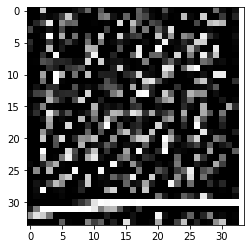

5 2


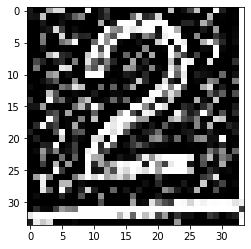

5 3


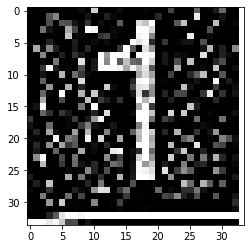

5 4


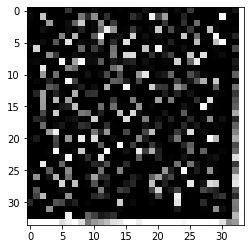

5 5


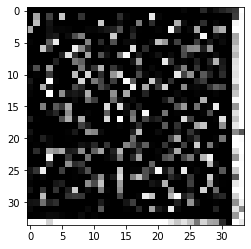

5 6


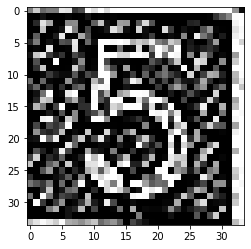

5 7


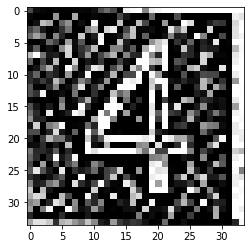

6 0


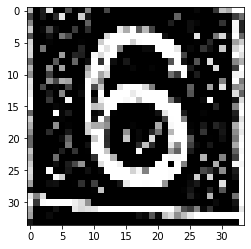

6 1


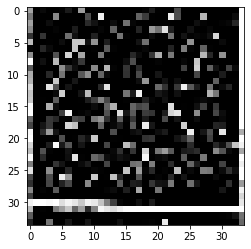

6 2


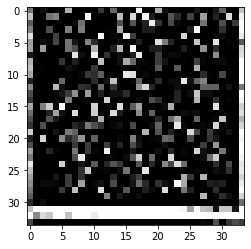

6 3


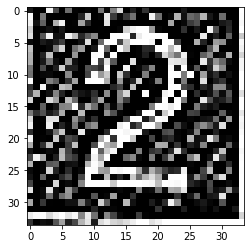

6 4


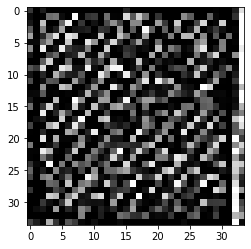

6 5


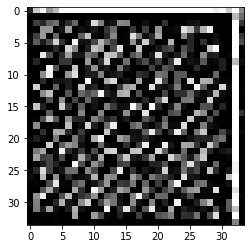

6 6


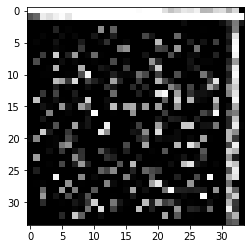

6 7


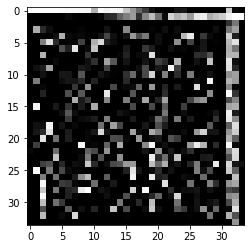

7 0


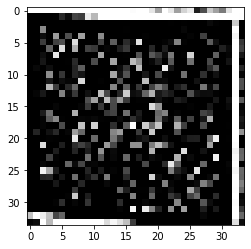

7 1


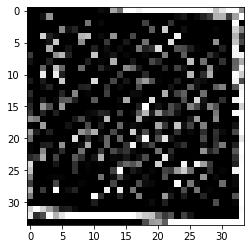

7 2


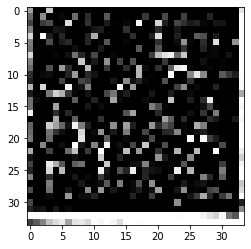

7 3


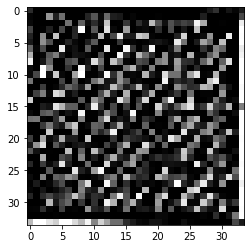

7 4


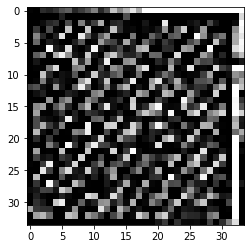

7 5


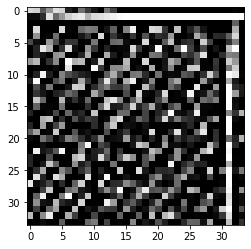

7 6


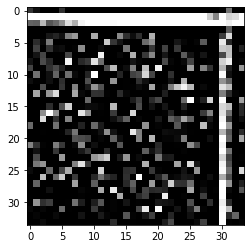

7 7


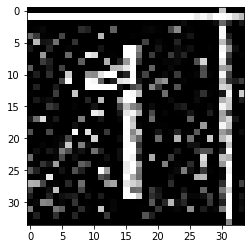

In [105]:
w ,h = img.shape
w = w//9
h = h//9
cell = img[h*1:2*h,0*w:1*w]
print(cell)
for x in range(8):
    for y in range(8):
        print(x,y)
        plt.imshow(img[y*h:(y+1)*h,x*w:(x+1)*w],cmap='gray')
        plt.show()

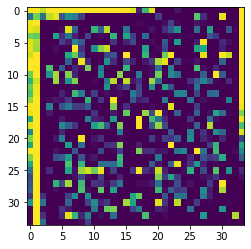

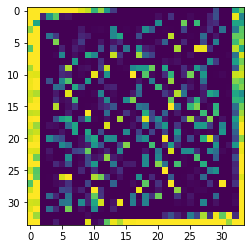

In [106]:
plt.imshow(cell)
plt.show()
plt.imshow(img[0:h,0:w])
plt.show()


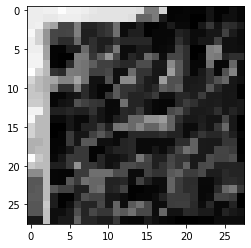

In [107]:

co = largestContour(cell)
x, y, w, h = cv2.boundingRect(co)
cell = make_it_square(cell[y:y + h, x:x + w], 28)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
cell = cv2.morphologyEx(cell, cv2.MORPH_CLOSE, kernel)
cell = 255 * (cell / 130)
plt.imshow(cell,cmap='gray')
plt.show()

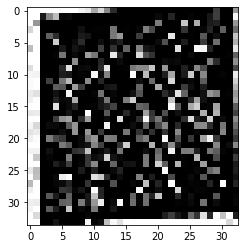

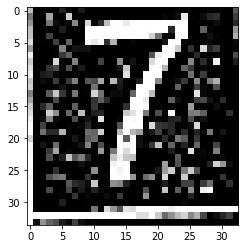

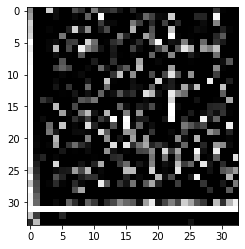

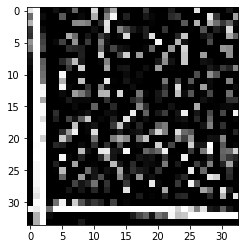

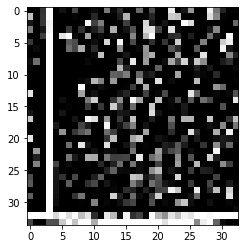

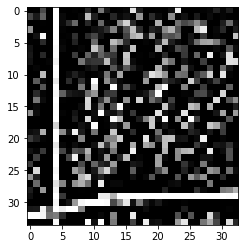

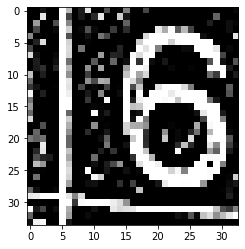

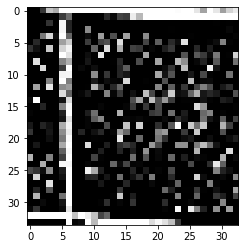

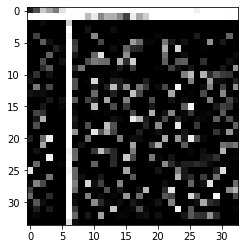

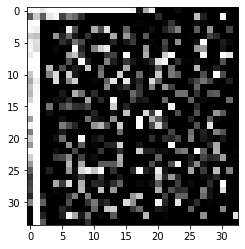

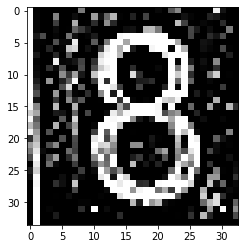

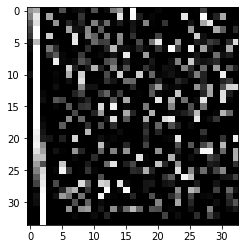

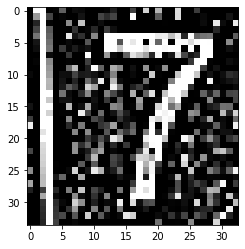

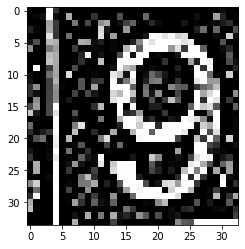

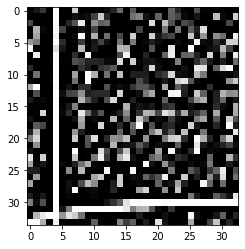

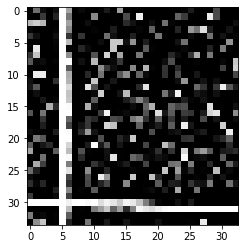

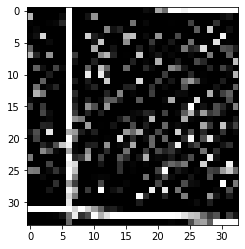

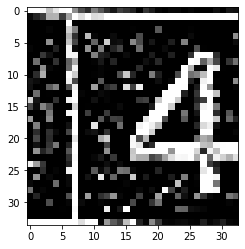

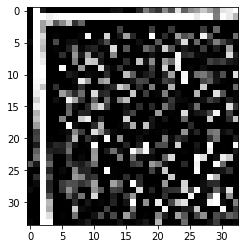

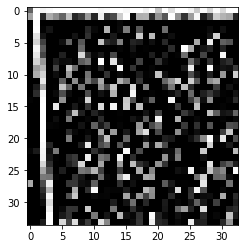

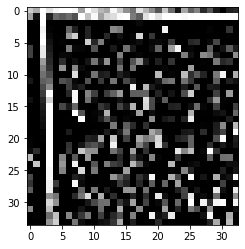

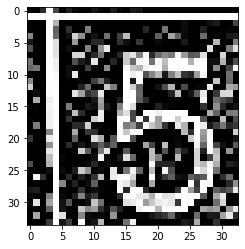

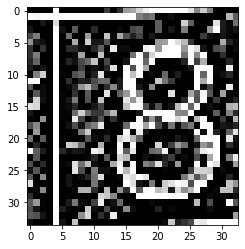

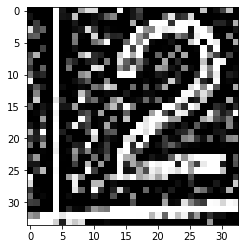

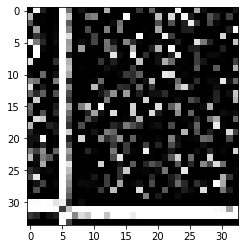

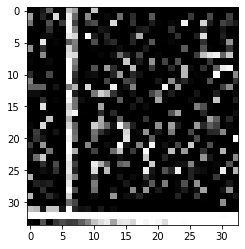

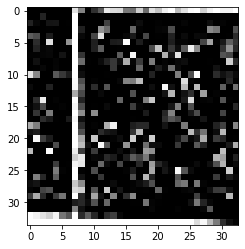

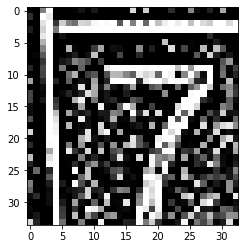

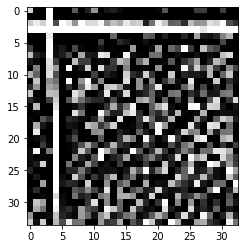

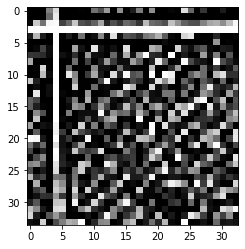

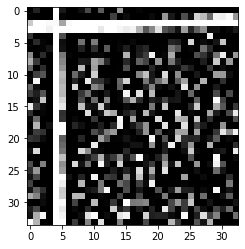

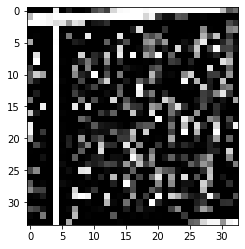

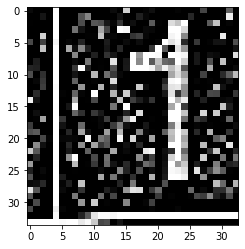

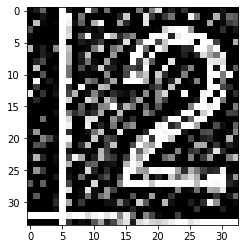

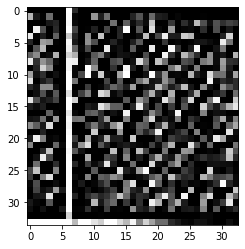

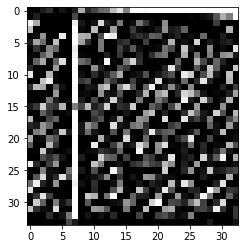

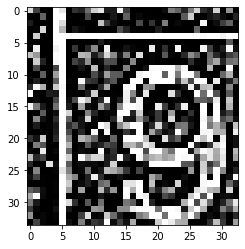

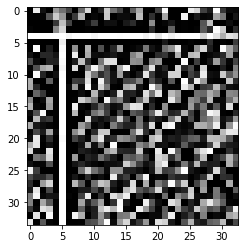

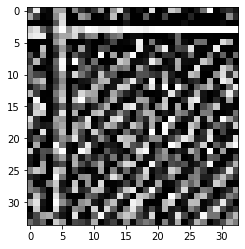

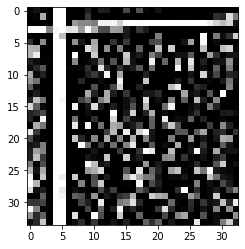

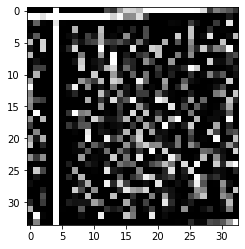

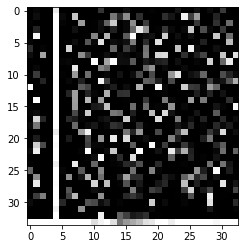

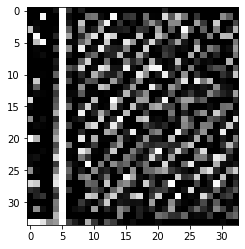

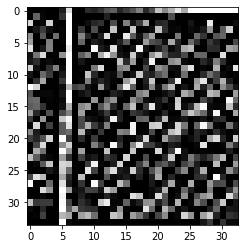

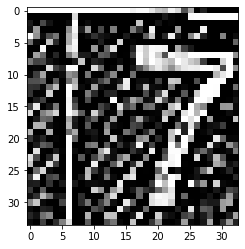

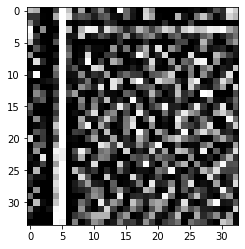

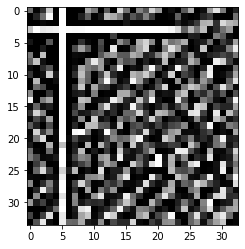

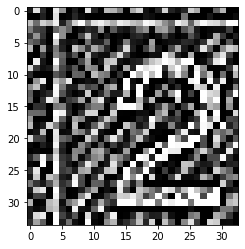

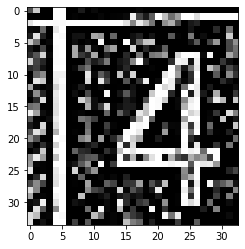

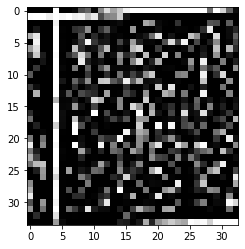

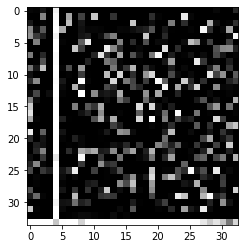

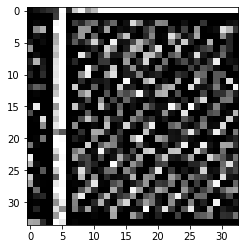

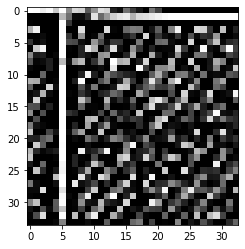

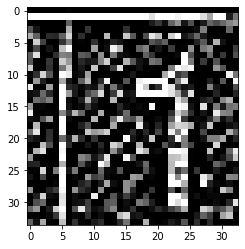

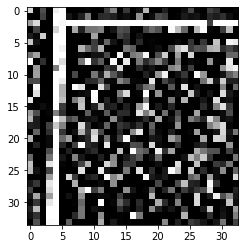

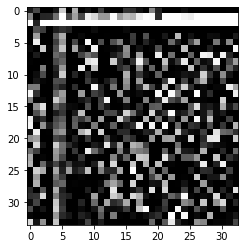

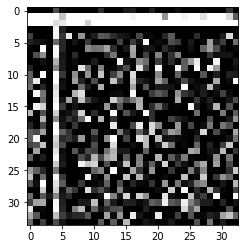

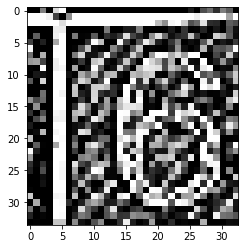

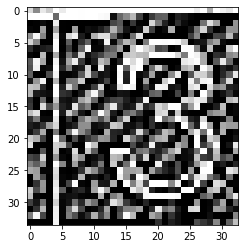

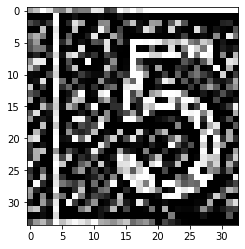

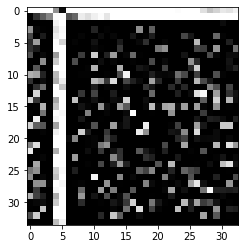

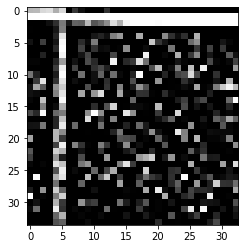

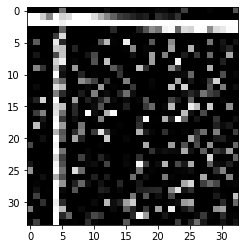

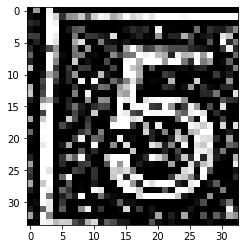

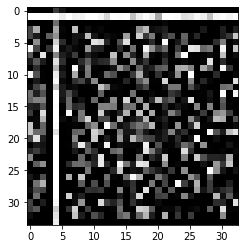

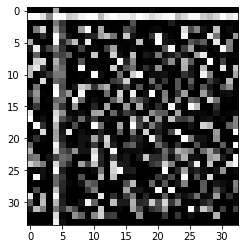

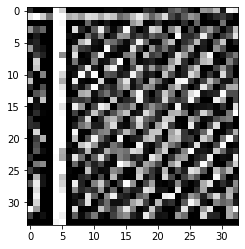

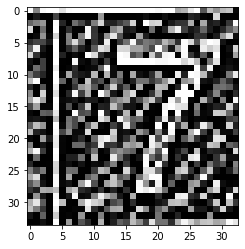

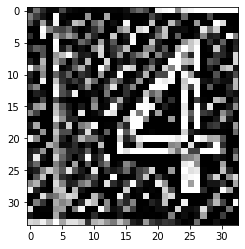

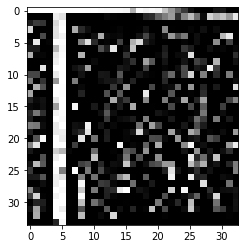

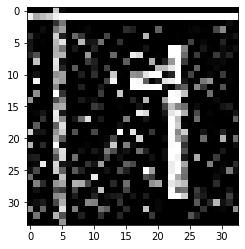

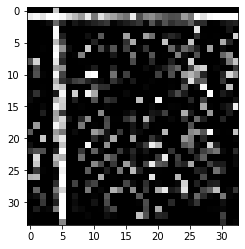

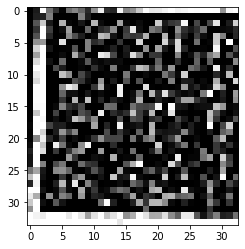

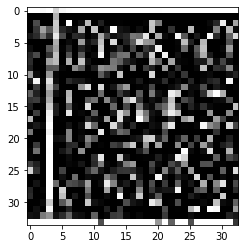

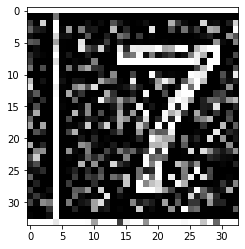

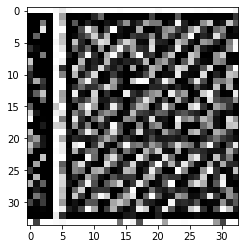

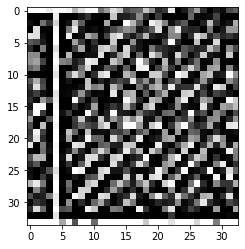

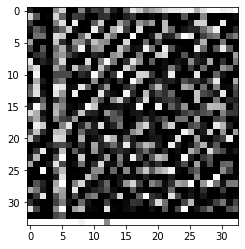

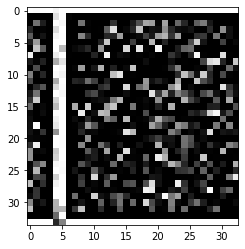

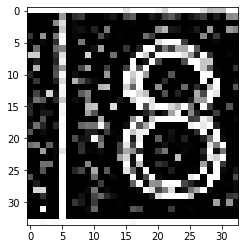

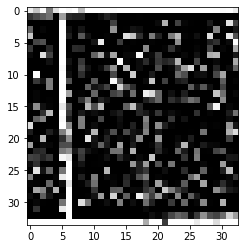

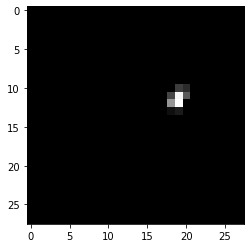

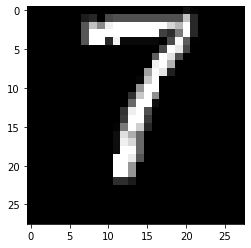

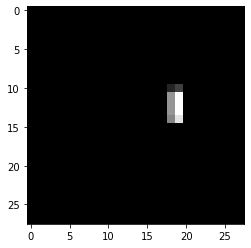

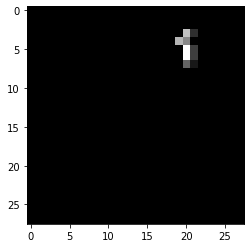

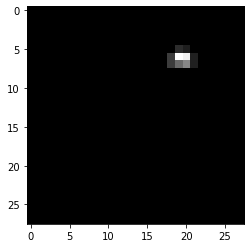

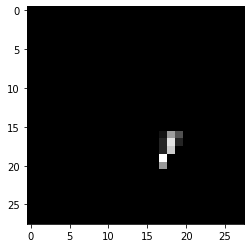

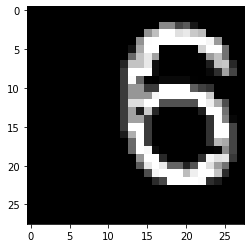

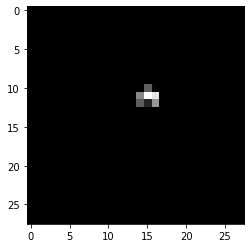

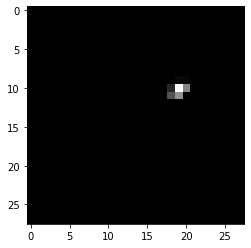

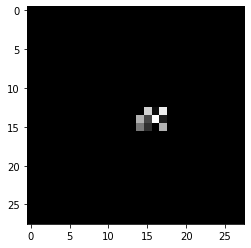

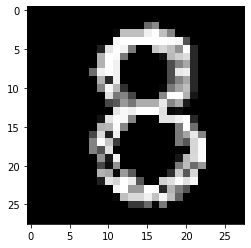

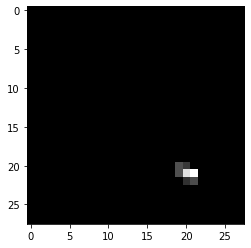

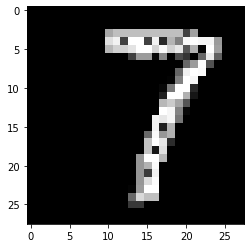

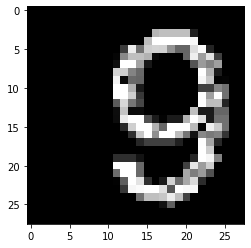

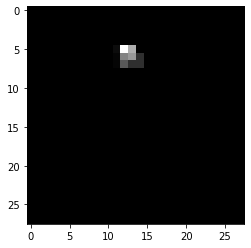

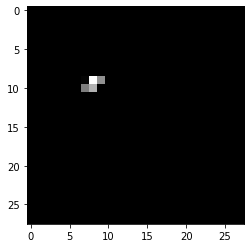

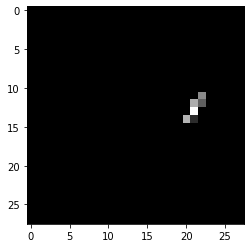

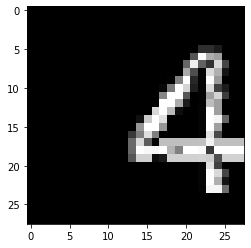

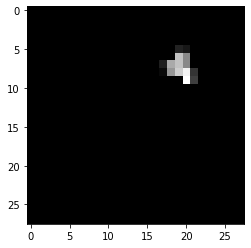

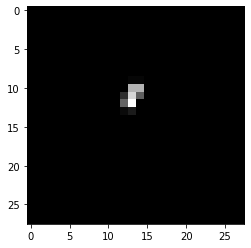

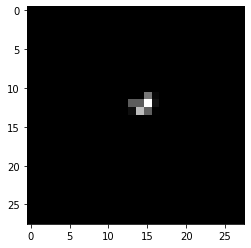

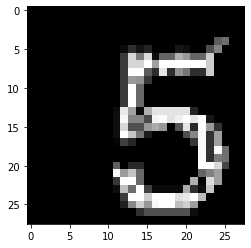

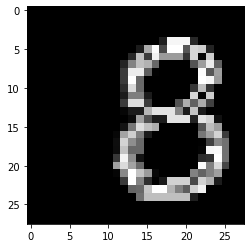

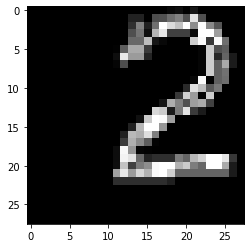

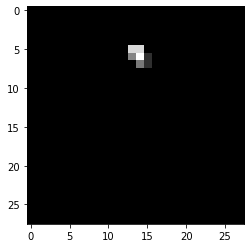

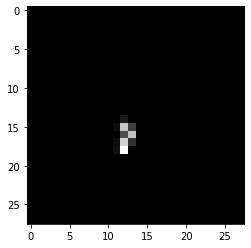

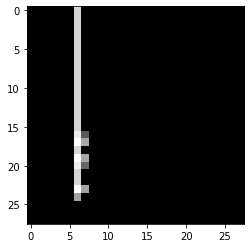

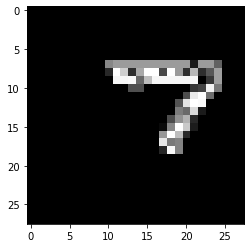

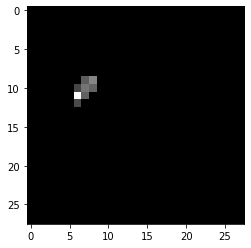

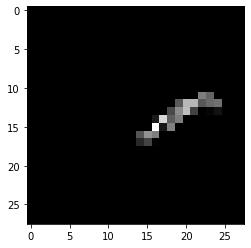

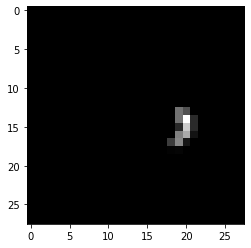

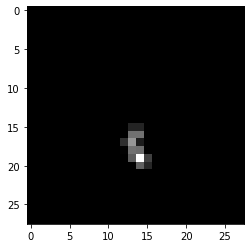

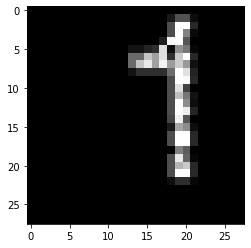

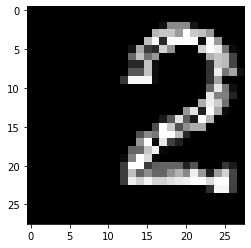

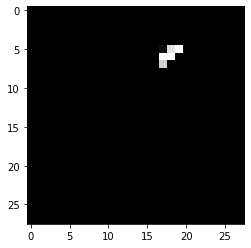

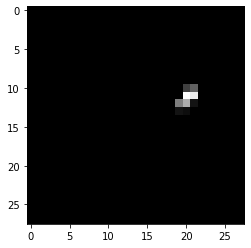

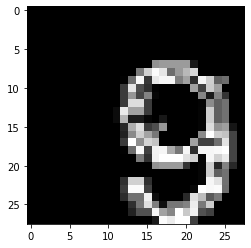

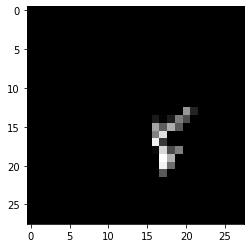

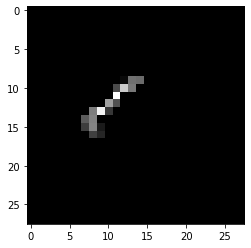

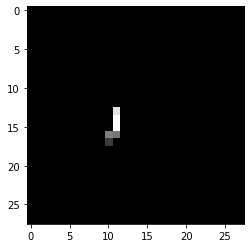

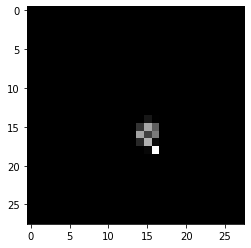

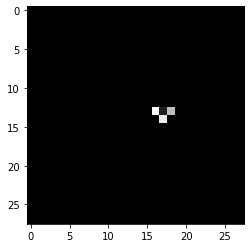

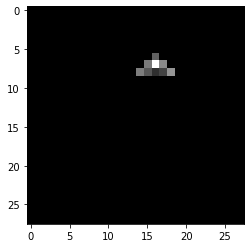

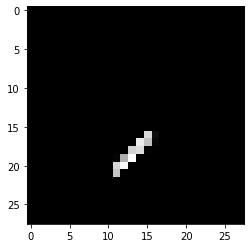

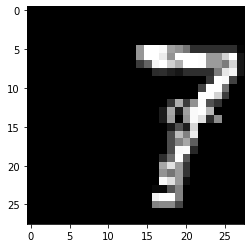

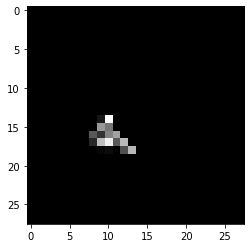

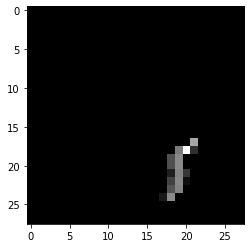

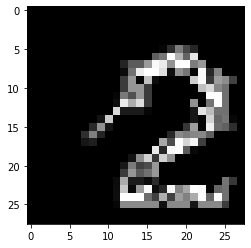

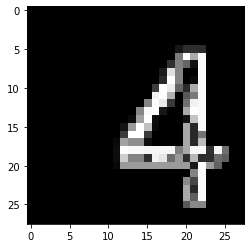

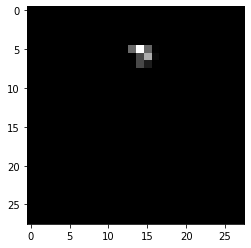

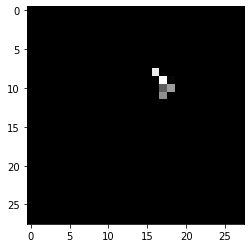

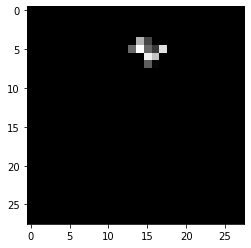

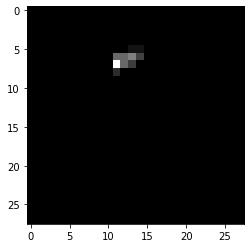

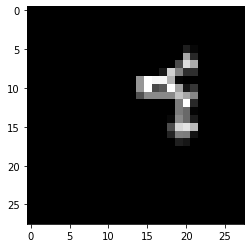

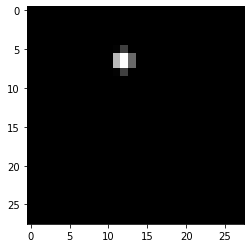

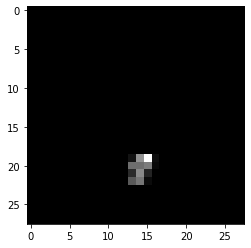

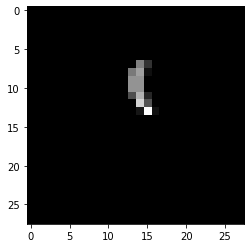

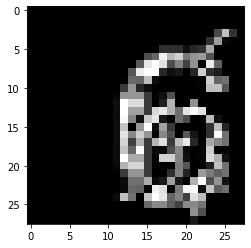

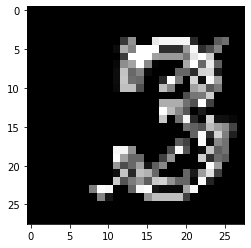

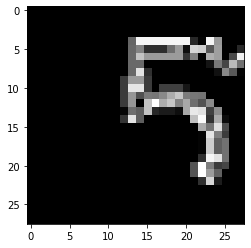

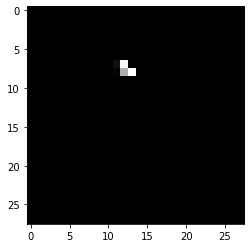

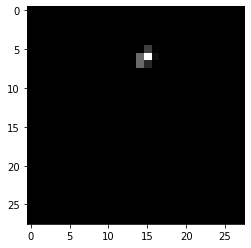

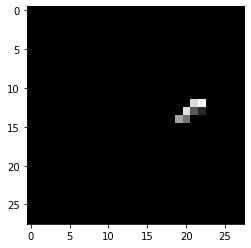

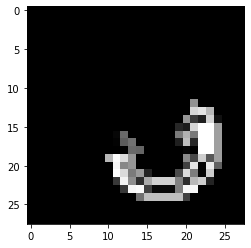

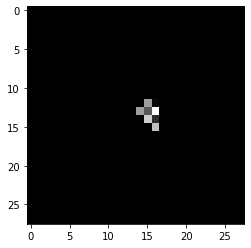

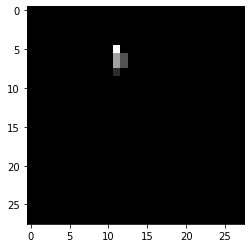

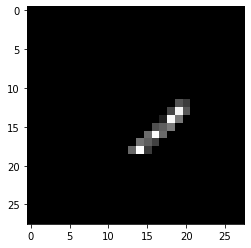

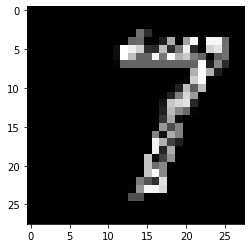

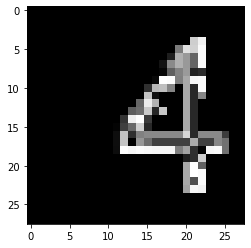

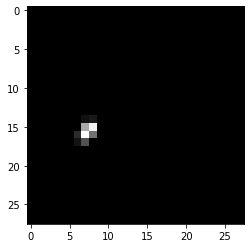

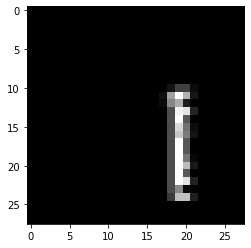

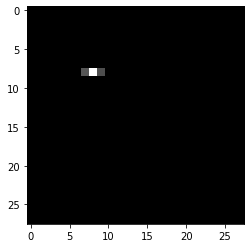

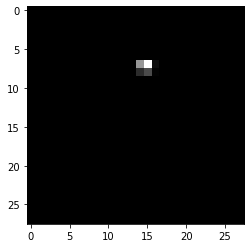

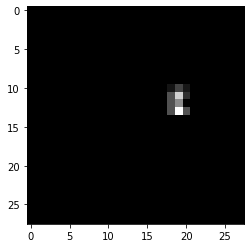

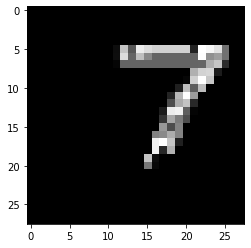

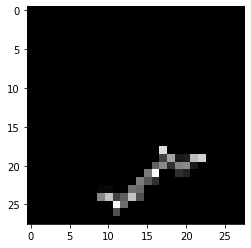

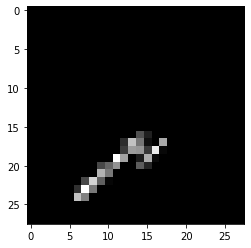

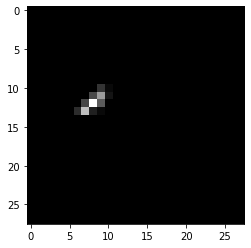

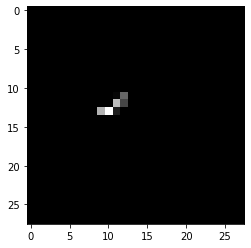

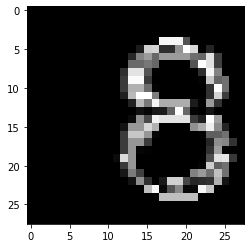

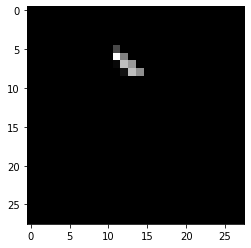

In [108]:
def bfs(digit,vis,i,j,cid,img):
    q = queue.Queue()
    q.put((i,j))
    while  not q.empty():
        #print("no exit")
        i , j = q.get()
        if i in range(h) and j  in range(w):
            if vis[i][j]==False:
                if img[i,j]>=160:
                    vis[i][j]=True
                    digit[i][j]=cid
                    for x in [0,-1,1]:
                        for y in [0,-1,1]:
                            q.put((i+x,j+y))
cells = []
kernel = np.ones((2,2), np.uint8) 
for x in range(9):
    rows = []
    for y in range(9):
        grid = img[x*h:(x+1)*h,y*w:(y+1)*w]
        
        plt.imshow(grid,cmap='gray')
        plt.show()
        #grid = cv2.dilate(grid,kernel)
        vis =[[False for i in range(w)] for j in range(h)]
        digit = [[0 for i in range(w)]for j in range(h)]
        cid = 1
        for i in range(h//4,3*h//4+1):
            for j in range(w//4,3*w//4+1):
                #print(i,j,x,y)
                bfs(digit,vis,i,j,cid,grid)
                #print("exit")
                cid+=1

        comp = [0 for t in range(cid)]
        for t in range(h):
            for u in range(w):
                if digit[t][u]!=0:
                    comp[digit[t][u]-1]+=1
        ma = comp.index(max(comp))
        for t in range(h):
            for u in range(w):
                if digit[t][u]==ma+1:
                    digit[t][u]=255
                else:
                    digit[t][u]=0
        digit = np.asarray(digit, dtype=np.uint8)
        digit =make_it_square(digit,28)
        rows.append(digit)
    cells.append(rows)
for rows in cells:
    for cell in rows:
        plt.imshow(cell,cmap='gray')
        plt.show()

In [67]:
from tensorflow import keras
import pandas as pd
import numpy as np
import keras.utils
import os
df = pd.read_csv('train.csv')
label = df.pop('label')
digitdf = df
digitdf = digitdf/255.0


print(digitdf.shape,label.shape)

from sklearn.model_selection import train_test_split  # to split data
X_train, X_test,Y_train, Y_test = train_test_split(digitdf,label)
from keras.models import Sequential
from keras import layers

X_train = X_train.values.reshape(-1, 28, 28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = keras.utils.to_categorical(Y_train, num_classes = 10)
Y_test = keras.utils.to_categorical(Y_test, num_classes = 10)
print(X_train.shape)

(42000, 784) (42000,)
(31500, 28, 28, 1)


In [68]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28,1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

#model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

model.fit(X_train, Y_train, epochs = 2, batch_size = 128, validation_data = (X_test, Y_test), verbose = 2)
#model.fit(X_train,Y_train,epochs=2,batch_size=32,validation_data=(X_test,Y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)        

(1, 28, 28, 1)
[[0.073956   0.08536255 0.07282814 0.11512274 0.06800773 0.23534928
  0.07085887 0.11731918 0.08556615 0.07562942]]
0.23534928
(1, 28, 28, 1)
[[6.7240643e-07 9.8841131e-01 1.1125826e-02 5.2611798e-05 1.0418393e-05
  1.3430576e-06 3.5557325e-05 3.1611696e-04 4.4074201e-05 2.1895487e-06]]
0.9884113
[1]


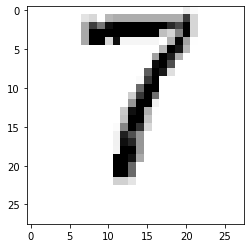

(1, 28, 28, 1)
[[0.05334661 0.12598133 0.14234538 0.11884032 0.11502102 0.06637259
  0.05057232 0.19835076 0.04710872 0.08206106]]
0.19835076
(1, 28, 28, 1)
[[0.09568166 0.07391331 0.06205429 0.07767431 0.04089484 0.34647703
  0.102547   0.06872583 0.06664578 0.06538597]]
0.34647703
(1, 28, 28, 1)
[[0.09668369 0.0691831  0.05273597 0.08056519 0.04272712 0.35399476
  0.08399673 0.07218815 0.0706666  0.07725868]]
0.35399476
(1, 28, 28, 1)
[[0.11511108 0.08695485 0.16396515 0.09931897 0.07103994 0.10922781
  0.15525201 0.10023845 0.02870124 0.07019047]]
0.16396515
(1, 28, 28, 1)
[[1.8198845e-04 3.8360274e-01 4.0880586e-03 6.1716099e-04 2.6632191e-05
  8.6773284e-02 1.6225232e-01 1.1667287e-05 3.6239028e-01 5.5875855e-05]]
0.38360274
(1, 28, 28, 1)
[[0.0830194  0.06287414 0.06834213 0.14714858 0.05914574 0.21089768
  0.05110015 0.1622182  0.04937661 0.10587735]]
0.21089768
(1, 28, 28, 1)
[[0.07764401 0.08796191 0.07254095 0.11407457 0.06504876 0.23607069
  0.0723191  0.11182238 0.08230941 

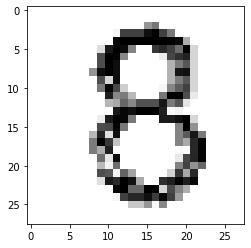

(1, 28, 28, 1)
[[0.08978374 0.12439052 0.18411918 0.10820181 0.06673812 0.09697404
  0.10564043 0.10124063 0.06166852 0.06124303]]
0.18411918
(1, 28, 28, 1)
[[6.6355875e-05 9.2550775e-04 4.3721417e-01 1.6960517e-02 3.5219298e-05
  6.3164208e-07 3.6268003e-07 5.4465449e-01 2.4653435e-05 1.1813972e-04]]
0.5446545
(1, 28, 28, 1)
[[5.7599100e-04 1.3199272e-03 1.0986215e-03 3.4651305e-03 3.9223698e-04
  5.7066691e-01 3.8293101e-02 1.5835909e-05 3.8385808e-01 3.1418691e-04]]
0.5706669
(1, 28, 28, 1)
[[0.0512863  0.08167357 0.1936535  0.22881341 0.04599486 0.0602914
  0.02739257 0.2128119  0.0378643  0.0602182 ]]
0.22881341
(1, 28, 28, 1)
[[0.0670739  0.1127849  0.12306627 0.14083435 0.07130016 0.11091198
  0.05929775 0.17452034 0.06334151 0.07686879]]
0.17452034
(1, 28, 28, 1)
[[0.0754042  0.09820113 0.1463176  0.10083431 0.09340922 0.08454517
  0.06746095 0.18618892 0.08967809 0.05796039]]
0.18618892
(1, 28, 28, 1)
[[4.8020756e-05 6.6828839e-02 8.9397728e-01 7.5930904e-04 2.5556600e-02
  6.

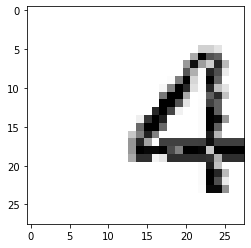

(1, 28, 28, 1)
[[0.08244495 0.0245498  0.01871695 0.04141714 0.01373135 0.6405364
  0.04495915 0.03965081 0.05173177 0.0422616 ]]
0.6405364
(1, 28, 28, 1)
[[0.07296834 0.09260489 0.07635505 0.1672622  0.07066826 0.15484138
  0.04690648 0.16249306 0.04413685 0.11176345]]
0.1672622
(1, 28, 28, 1)
[[0.04123911 0.09878186 0.0609892  0.19481216 0.06725565 0.2139791
  0.0425682  0.11849644 0.04214196 0.11973632]]
0.2139791
(1, 28, 28, 1)
[[8.6803157e-05 4.8291538e-05 6.0928874e-06 1.3812837e-03 1.6198223e-05
  9.8160338e-01 1.3557762e-03 6.2820295e-06 1.4808430e-02 6.8729551e-04]]
0.9816034
[5]


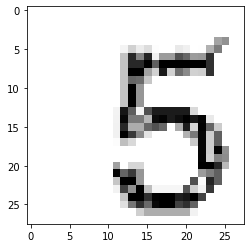

(1, 28, 28, 1)
[[7.5727620e-04 2.5601216e-02 1.7929061e-03 3.0601100e-04 3.4206544e-04
  3.3156511e-03 2.3783218e-02 3.1358437e-04 9.4340730e-01 3.8075662e-04]]
0.9434073
[8]


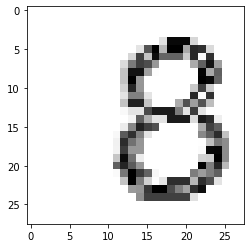

(1, 28, 28, 1)
[[9.7471875e-06 1.6266365e-03 9.9725002e-01 1.1921799e-04 8.4270243e-07
  2.6120758e-06 8.1732194e-04 1.0306885e-04 7.0204922e-05 3.0865351e-07]]
0.99725
[2]


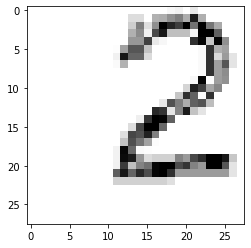

(1, 28, 28, 1)
[[0.07286374 0.09798698 0.15059091 0.16465126 0.06638639 0.09690144
  0.05169412 0.16491586 0.05422916 0.07978015]]
0.16491586
(1, 28, 28, 1)
[[0.0436215  0.15561847 0.14613357 0.10745954 0.0824343  0.13827197
  0.09369748 0.07536361 0.06373359 0.09366602]]
0.15561847
(1, 28, 28, 1)
[[0.38474548 0.00912304 0.00624818 0.00087229 0.03350921 0.00794234
  0.5270678  0.01145042 0.00461867 0.01442261]]
0.5270678
(1, 28, 28, 1)
[[2.7328029e-03 1.2607462e-04 3.1813506e-02 1.3402770e-02 5.1999385e-05
  5.9422386e-05 2.7499700e-06 9.4783723e-01 6.7265770e-05 3.9061909e-03]]
0.94783723
[7]


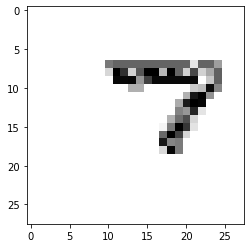

(1, 28, 28, 1)
[[0.06995069 0.11400878 0.11470514 0.11736781 0.07285339 0.10910878
  0.06767715 0.19351618 0.07274465 0.06806745]]
0.19351618
(1, 28, 28, 1)
[[0.01801563 0.0867226  0.19574118 0.12168305 0.17475286 0.04734785
  0.06549054 0.13826138 0.07631887 0.07566598]]
0.19574118
(1, 28, 28, 1)
[[0.08911049 0.0763369  0.22559404 0.09383491 0.11279006 0.04931716
  0.09450959 0.16995738 0.02766929 0.06088025]]
0.22559404
(1, 28, 28, 1)
[[0.04836749 0.16209033 0.17269616 0.10227661 0.05901692 0.14543012
  0.1410571  0.0582303  0.06027848 0.05055647]]
0.17269616
(1, 28, 28, 1)
[[1.8708780e-02 4.9699224e-03 5.6189728e-01 6.1271124e-02 1.7372295e-03
  3.0884784e-04 2.7037677e-04 3.2532164e-01 6.9172372e-04 2.4823204e-02]]
0.5618973
(1, 28, 28, 1)
[[2.3714970e-03 4.1616354e-02 9.3103719e-01 9.2890061e-04 1.2735456e-04
  1.6879334e-04 1.1841026e-02 1.0408875e-02 1.4166305e-03 8.3402563e-05]]
0.9310372
[2]


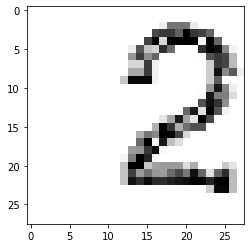

(1, 28, 28, 1)
[[0.10011365 0.08590373 0.07502583 0.09450217 0.05278004 0.25569317
  0.09247082 0.08663867 0.07177007 0.08510188]]
0.25569317
(1, 28, 28, 1)
[[0.06410804 0.07714919 0.05984082 0.10205013 0.05737334 0.290495
  0.06569377 0.10896222 0.11373226 0.06059516]]
0.290495
(1, 28, 28, 1)
[[0.0123314  0.01065263 0.00280279 0.0178997  0.0025123  0.87603277
  0.03377092 0.00151865 0.03516325 0.00731548]]
0.87603277
[5]


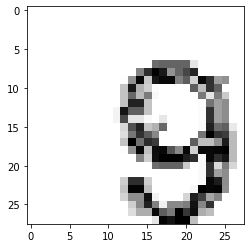

(1, 28, 28, 1)
[[0.04166151 0.123528   0.28592005 0.07866241 0.08439387 0.04600989
  0.18480577 0.08270431 0.02453918 0.04777502]]
0.28592005
(1, 28, 28, 1)
[[0.13019784 0.0499313  0.05261013 0.07773078 0.08275518 0.11882247
  0.05386332 0.29464188 0.02568342 0.11376372]]
0.29464188
(1, 28, 28, 1)
[[0.11742713 0.10320336 0.07441749 0.0531276  0.12706707 0.13339324
  0.13035032 0.12982114 0.04003639 0.09115623]]
0.13339324
(1, 28, 28, 1)
[[0.02996723 0.13380732 0.18652524 0.14778928 0.09051939 0.1257627
  0.10893331 0.06369283 0.04581476 0.06718794]]
0.18652524
(1, 28, 28, 1)
[[0.03314227 0.06230471 0.06952188 0.18461876 0.08866313 0.25396505
  0.0630208  0.09017777 0.06404028 0.09054526]]
0.25396505
(1, 28, 28, 1)
[[0.12804633 0.0310846  0.09955947 0.14226414 0.02137109 0.23771738
  0.02514642 0.1571889  0.04346649 0.1141552 ]]
0.23771738
(1, 28, 28, 1)
[[0.07356658 0.14750811 0.15608303 0.081373   0.07347985 0.10583406
  0.12469926 0.10370736 0.06162596 0.07212273]]
0.15608303
(1, 28,

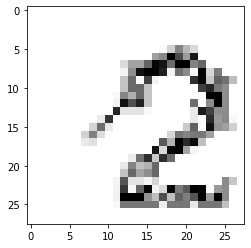

(1, 28, 28, 1)
[[1.2261237e-04 7.2535229e-01 2.1716939e-01 1.1089594e-03 3.4039805e-03
  1.2142800e-04 5.1334593e-02 7.5940683e-04 5.7247456e-04 5.4935619e-05]]
0.7253523
[1]


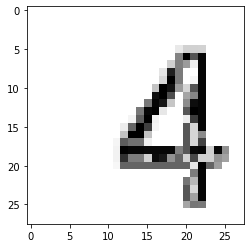

(1, 28, 28, 1)
[[0.07230582 0.08615206 0.1780377  0.18381768 0.05324682 0.08848591
  0.04180136 0.17003198 0.05115911 0.07496154]]
0.18381768
(1, 28, 28, 1)
[[0.10391465 0.06597511 0.08941708 0.14048329 0.05342861 0.16405584
  0.04627001 0.18899918 0.04841854 0.09903765]]
0.18899918
(1, 28, 28, 1)
[[0.06772919 0.05335719 0.24115698 0.2309667  0.02407087 0.09189013
  0.02428632 0.16036622 0.04084818 0.06532821]]
0.24115698
(1, 28, 28, 1)
[[0.04861044 0.0640458  0.17263767 0.24436238 0.03889541 0.05355177
  0.01984523 0.2611884  0.03194326 0.06491964]]
0.2611884
(1, 28, 28, 1)
[[0.07181524 0.00907668 0.05456612 0.12030649 0.01081933 0.04000321
  0.0039932  0.59377986 0.00783369 0.08780616]]
0.59377986
(1, 28, 28, 1)
[[0.0580204  0.0872658  0.16152053 0.20246239 0.05437214 0.06965626
  0.0335107  0.2159416  0.04146209 0.07578807]]
0.2159416
(1, 28, 28, 1)
[[0.07169394 0.14200167 0.09224404 0.09252654 0.09551579 0.14248402
  0.09957624 0.12261052 0.05903402 0.08231323]]
0.14248402
(1, 28, 

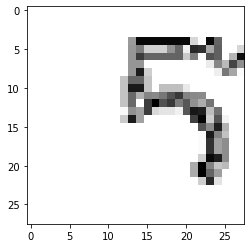

(1, 28, 28, 1)
[[0.06565155 0.09284396 0.14100952 0.17043786 0.0646809  0.0952182
  0.04550169 0.19545482 0.04538401 0.08381741]]
0.19545482
(1, 28, 28, 1)
[[0.08448518 0.10008474 0.12022194 0.13431655 0.06976174 0.13065355
  0.06774712 0.13699801 0.06251198 0.09321919]]
0.13699801
(1, 28, 28, 1)
[[0.06448461 0.09690654 0.12734158 0.10512487 0.09238253 0.10668874
  0.07726125 0.15979402 0.10566791 0.06434795]]
0.15979402
(1, 28, 28, 1)
[[0.3170214  0.02857268 0.31972122 0.0171415  0.00582944 0.02323751
  0.23931442 0.01009342 0.0293886  0.00967992]]
0.31972122
(1, 28, 28, 1)
[[0.0201786  0.10475653 0.05831557 0.2296637  0.0876732  0.22468469
  0.04911738 0.06407563 0.04696815 0.1145666 ]]
0.2296637
(1, 28, 28, 1)
[[0.06097194 0.10225647 0.16692996 0.17202249 0.07029971 0.08720403
  0.05174977 0.1737899  0.04373048 0.07104529]]
0.1737899
(1, 28, 28, 1)
[[0.02281632 0.09690305 0.36806992 0.0592075  0.11624842 0.0206057
  0.10649605 0.1280508  0.02343137 0.05817088]]
0.36806992
(1, 28, 28

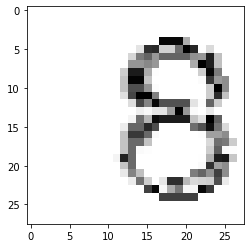

(1, 28, 28, 1)
[[0.0596762  0.07427142 0.15367186 0.20690884 0.04929226 0.0721386
  0.02869142 0.24013555 0.03857231 0.07664152]]
0.24013555


In [111]:
#print(X_train)
sku = []
for rows in cells:
    r = []
    for cell in rows:
        cell = cell/255.0
        
        dig = np.reshape(cell,(1,28,28,1))
        print(dig.shape)
        
        pred = model.predict(dig)
        """for x in range(10):
            print(pred)
            if pred[0,x]>0.70:
                g = x
                dig = np.reshape(dig,(28,28))
                plt.imshow(dig,cmap='binary')
                plt.show()
                print(g)
        """
        print(pred)
        print(np.amax(pred))
        if np.amax(pred)>0.70:
            results = np.argmax(pred, axis = 1)
            print(results)
            r.append(results[0])
            plt.imshow(cell,cmap='binary')
            plt.show()
        else:
            r.append("-")
    sku.append(r)

In [112]:
print(sku)

[['-', 1, '-', '-', '-', '-', '-', '-', '-'], ['-', 8, '-', '-', '-', '-', '-', '-', 2], ['-', '-', '-', 5, 8, 2, '-', '-', '-'], [7, '-', '-', '-', '-', '-', 2, '-', '-'], [5, '-', '-', '-', '-', '-', '-', '-', '-'], ['-', '-', 0, 1, '-', '-', '-', '-', '-'], ['-', '-', '-', '-', '-', 5, '-', '-', '-'], ['-', '-', '-', '-', '-', '-', '-', '-', '-'], ['-', '-', '-', '-', '-', '-', '-', 8, '-']]
